In [ ]:
# Import necessary libraries and packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

# Set floating point precision option for pandas
pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Import seaborn library and set context and style
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')

# Import warnings and set filter to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Import time library
from time import time

# Import matplotlib ticker and scipy stats
import matplotlib.ticker as tkr
from scipy import stats

# Import statistical tools for time series analysis
from statsmodels.tsa.stattools import adfuller

# Import preprocessing from sklearn
from sklearn import preprocessing

# Import partial autocorrelation function from statsmodels
from statsmodels.tsa.stattools import pacf

# Enable inline plotting in Jupyter Notebook
%matplotlib inline

# Import math library
import math

# Import necessary functions from keras
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *

# Import MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler

# Import mean squared error and mean absolute error from sklearn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Import early stopping from keras callbacks
from keras.callbacks import EarlyStopping

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Copy of bareily_hourly.csv')

# Print the number of rows and columns in the data
print('Number of rows and columns:', data.shape)

# Display the first 5 rows of the data
data.head(5)


Number of rows and columns: (763320, 22)


,Unnamed: 0,Smart_Meter,Timestamp,Electricity_consumption(kWh),Avg_Voltage(Volt),Avg_Current(Amp),Freq(Hz),Date,Year,Month,...,Dayofyear,Dayofweek,Weekday,Hour,Minute,Quarter,TIME,Season,Time,Time_Category
0,0,BR02,2019-07-10 00:00:00,0.4050,242.0990,1.7680,50.0240,2019-07-10,2019,7,...,191,2,2,0,0,3,00:00:00,Summer,Night,Midnight
1,1,BR02,2019-07-10 01:00:00,0.4460,244.2410,1.9050,50.0470,2019-07-10,2019,7,...,191,2,2,1,0,3,01:00:00,Summer,Night,Midnight
2,2,BR02,2019-07-10 02:00:00,0.4470,246.5320,1.8895,50.0355,2019-07-10,2019,7,...,191,2,2,2,0,3,02:00:00,Summer,Night,Midnight
3,3,BR02,2019-07-10 03:00:00,0.4500,248.4090,1.8815,50.0585,2019-07-10,2019,7,...,191,2,2,3,0,3,03:00:00,Summer,Night,Midnight
4,4,BR02,2019-07-10 04:00:00,0.4540,249.7030,1.8870,50.0370,2019-07-10,2019,7,...,191,2,2,4,0,3,04:00:00,Summer,Night,Midnight


In [ ]:
print("\nInformation about the dataframe:")
print(data.info())


Information about the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763320 entries, 0 to 763319
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    763320 non-null  int64  
 1   Smart_Meter                   763320 non-null  object 
 2   Timestamp                     763320 non-null  object 
 3   Electricity_consumption(kWh)  763320 non-null  float64
 4   Avg_Voltage(Volt)             763320 non-null  float64
 5   Avg_Current(Amp)              763320 non-null  float64
 6   Freq(Hz)                      763320 non-null  float64
 7   Date                          763320 non-null  object 
 8   Year                          763320 non-null  int64  
 9   Month                         763320 non-null  int64  
 10  Week                          763320 non-null  int64  
 11  Day                           763320 non-null  int64  
 12  Dayofyear 

In [ ]:
print("\nData type of each column in the dataframe:")
print(data.dtypes)


Data type of each column in the dataframe:
Unnamed: 0                        int64
Smart_Meter                      object
Timestamp                        object
Electricity_consumption(kWh)    float64
Avg_Voltage(Volt)               float64
Avg_Current(Amp)                float64
Freq(Hz)                        float64
Date                             object
Year                              int64
Month                             int64
Week                              int64
Day                               int64
Dayofyear                         int64
Dayofweek                         int64
Weekday                           int64
Hour                              int64
Minute                            int64
Quarter                           int64
TIME                             object
Season                           object
Time                             object
Time_Category                    object
dtype: object


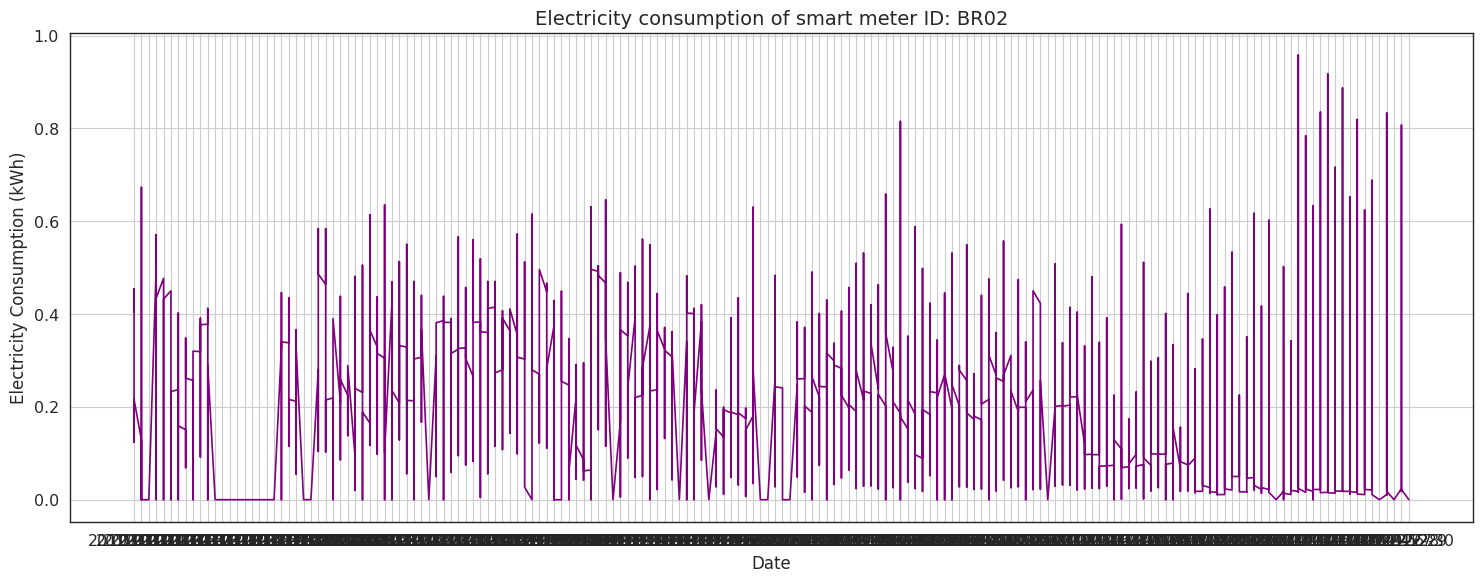

In [ ]:
data_BR02 = data[(data['Date'] >= '2019-07-10') & (data['Date'] < '2019-12-31') & (data['Smart_Meter'] == 'BR02')]

plt.figure(figsize=(15,6))
plt.plot(data_BR02['Date'], data_BR02['Electricity_consumption(kWh)'], color='purple')
plt.ylabel('Electricity Consumption (kWh)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.title('Electricity consumption of smart meter ID: BR02', fontsize=14)
plt.tight_layout()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Transform the 'Electricity_consumption(kWh)' column into a numpy array of float values
dataset = data['Electricity_consumption(kWh)'].values.astype('float32')

# Reshape the numpy array into a 2D array with 1 column
dataset = np.reshape(dataset, (-1, 1))

# Create an instance of the MinMaxScaler class to scale the values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit the MinMaxScaler to the transformed data and transform the values
dataset = scaler.fit_transform(dataset)

# Split the transformed data into a training set (80%) and a test set (20%)
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]


In [ ]:
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [ ]:
# reshape into X=t and Y=t+1
look_back = 30
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

X_train.shape

(610625, 30)

In [ ]:
Y_train.shape

(610625,)

In [ ]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
X_train.shape

(610625, 1, 30)

In [ ]:
# LSTM Model
# Defining the LSTM model
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.optimizers import SGD

model = Sequential()

# Adding the first layer with 100 LSTM units and input shape of the data
model.add(LSTM(2000, input_shape=(X_train.shape[1], X_train.shape[2])))

# Adding a dropout layer to avoid overfitting
model.add(Dropout(0.9))

# Adding a dense layer with 1 unit to make predictions
model.add(Dense(30, activation='relu', kernel_constraint=MaxNorm(3)))

# Compile model
sgd = SGD(learning_rate=0.1, momentum=0.9)

# Compiling the model with mean squared error as the loss function and using Adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

# Fitting the model on training data and using early stopping to avoid overfitting
history = model.fit(X_train, Y_train, epochs=15, batch_size=16, validation_data=(X_test, Y_test),
        callbacks=[EarlyStopping(monitor='val_loss', patience=25)], verbose=2, shuffle=False)

Epoch 1/15
38165/38165 - 461s - loss: 0.0020 - accuracy: 0.1403 - val_loss: 0.0030 - val_accuracy: 0.0855 - 461s/epoch - 12ms/step
Epoch 2/15
38165/38165 - 461s - loss: 0.0018 - accuracy: 0.1560 - val_loss: 0.0029 - val_accuracy: 0.1035 - 461s/epoch - 12ms/step
Epoch 3/15
38165/38165 - 461s - loss: 0.0018 - accuracy: 0.1569 - val_loss: 0.0028 - val_accuracy: 0.1066 - 461s/epoch - 12ms/step
Epoch 4/15
38165/38165 - 501s - loss: 0.0017 - accuracy: 0.1599 - val_loss: 0.0028 - val_accuracy: 0.1076 - 501s/epoch - 13ms/step
Epoch 5/15
38165/38165 - 460s - loss: 0.0017 - accuracy: 0.1618 - val_loss: 0.0028 - val_accuracy: 0.1049 - 460s/epoch - 12ms/step
Epoch 6/15
38165/38165 - 500s - loss: 0.0017 - accuracy: 0.1619 - val_loss: 0.0027 - val_accuracy: 0.1007 - 500s/epoch - 13ms/step
Epoch 7/15
38165/38165 - 459s - loss: 0.0017 - accuracy: 0.1618 - val_loss: 0.0027 - val_accuracy: 0.1029 - 459s/epoch - 12ms/step
Epoch 8/15
38165/38165 - 458s - loss: 0.0016 - accuracy: 0.1632 - val_loss: 0.0027 

In [ ]:
# # make predictions
# train_predict = model.predict(X_train)
# test_predict = model.predict(X_test)
# # invert predictions
# train_predict = scaler.inverse_transform(train_predict)
# Y_train = scaler.inverse_transform([Y_train])
# test_predict = scaler.inverse_transform(test_predict)
# Y_test = scaler.inverse_transform([Y_test])

# print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
# print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
# print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
# print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))

4770/4770 [==============================] - 19s 4ms/step
Train Mean Absolute Error: 0.10804084907593695
Train Root Mean Squared Error: 0.22491049062594196
Test Mean Absolute Error: 0.1420507685104328
Test Root Mean Squared Error: 0.28137543894216377


In [ ]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([y_test])

# Calculate additional evaluation metrics
train_mae = mean_absolute_error(Y_train[0], train_predict[:, 0])
train_rmse = np.sqrt(mean_squared_error(Y_train[0], train_predict[:, 0]))
test_mae = mean_absolute_error(Y_test[0], test_predict[:, 0])
test_rmse = np.sqrt(mean_squared_error(Y_test[0], test_predict[:, 0]))

# Calculate MAPE
train_mape = mean_absolute_percentage_error(Y_train[0], train_predict[:, 0])
test_mape = mean_absolute_percentage_error(Y_test[0], test_predict[:, 0])

print('Train Mean Absolute Error:', train_mae)
print('Train Root Mean Squared Error:', train_rmse)
print('Train Mean Absolute Percentage Error:', train_mape)
print('Test Mean Absolute Error:', test_mae)
print('Test Root Mean Squared Error:', test_rmse)
print('Test Mean Absolute Percentage Error:', test_mape)


In [ ]:
import sklearn.metrics as sm
#print("Mean absolute error =", round(sm.mean_absolute_error(Y_test, X_test_pred), 2))
#print("Mean squared error =", round(sm.mean_squared_error(Y_test, X_test_pred), 2))
#print("Median absolute error =", round(sm.median_absolute_error(Y_test, X_test_pred), 2))
#print("Explain variance score =", round(sm.explained_variance_score(Y_test, Y_test_pred), 2))
#print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

print("R2 score =", round(sm.r2_score(Y_test[0], test_predict[:,0]), 2))

R2 score = 0.66


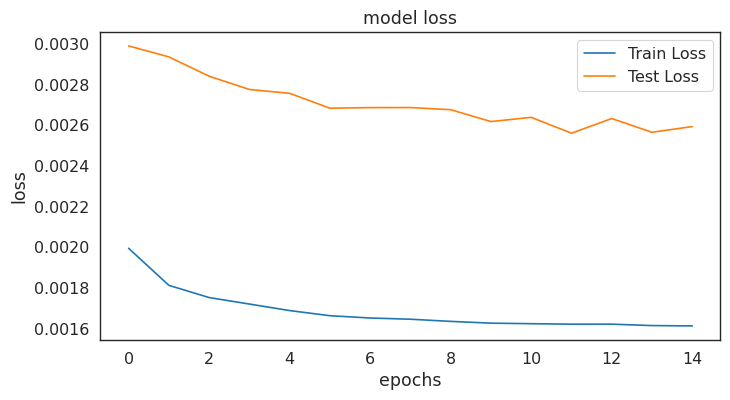

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

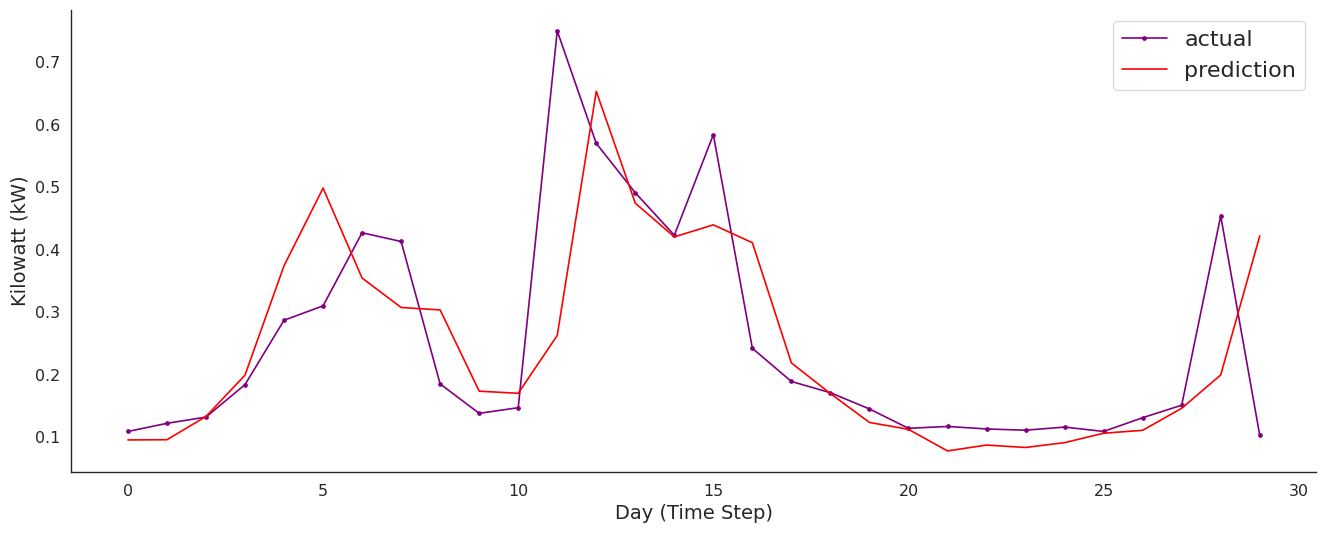

In [ ]:
aa=[x for x in range(30)]
# Creating a figure object with desired figure size
#plt.rcParams.update({'font.size': 100})

plt.figure(figsize=(15,6))

# Plotting the actual values in blue with a dot marker
#plt.plot(aa, Y_test[0][:30], marker='.', label="history", color='purple')

plt.plot(aa, Y_test[0][:30], marker='.', label="actual", color='purple')

# Plotting the predicted values in green with a solid line
plt.plot(aa, test_predict[:,0][:30], '-', label="prediction", color='red')

# Removing the top spines
sns.despine(top=True)

# Adjusting the subplot location
plt.subplots_adjust(left=0.07)

# Labeling the y-axis
plt.ylabel('Kilowatt (kW)', size=14)

# Labeling the x-axis
plt.xlabel('Day (Time Step)', size=14)

# Adding a legend with font size of 15
plt.legend(fontsize=16)

# Display the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt1

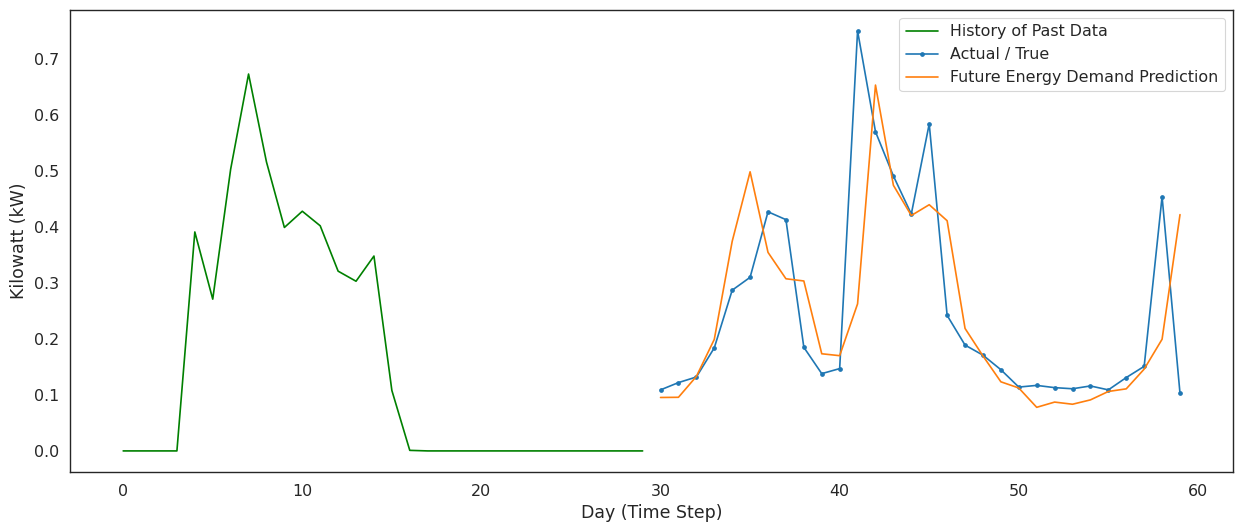

In [ ]:
aa=[x for x in range(30)]
plt1.figure(figsize=(15,6))
#plt.rcParams.update({'font.size': 100})
plt1.plot(np.arange(0, len(Y_train[0][:30])), Y_train[0][:30], 'g', label="History of Past Data")
plt1.plot(np.arange(len(Y_train[0][:30]), len(Y_train[0][:30]) + len(Y_test[0][:30])), Y_test[0][:30], marker='.', label="Actual / True")
plt1.plot(np.arange(len(Y_train[0][:30]), len(Y_train[0][:30]) + len(Y_test[0][:30])), test_predict[:,0][:30], '-', label="Future Energy Demand Prediction")
plt1.ylabel('Kilowatt (kW)')
plt1.xlabel('Day (Time Step)')
plt1.legend()
plt1.show();

In [ ]:
# # Evaluate the model on the test data
# scores = model.evaluate(X_test, Y_test, verbose=1)

# # Print the scores (loss and accuracy)
# print("Test Loss:", scores[0])
# print("Test Accuracy:", scores[1])


In [ ]:
# Assuming your model has been trained and you're using it to make predictions on the test data
Y_pred = model.predict(X_test)

# Assuming Y_pred and Y_test are in the appropriate shape
# Calculate accuracy
accuracy = np.mean(np.equal(np.argmax(Y_test, axis=1), np.argmax(Y_pred, axis=1)))

print("Accuracy: %.2f%%" % (accuracy * 100))


4770/4770 [==============================] - 19s 4ms/step
Accuracy: 17.86%


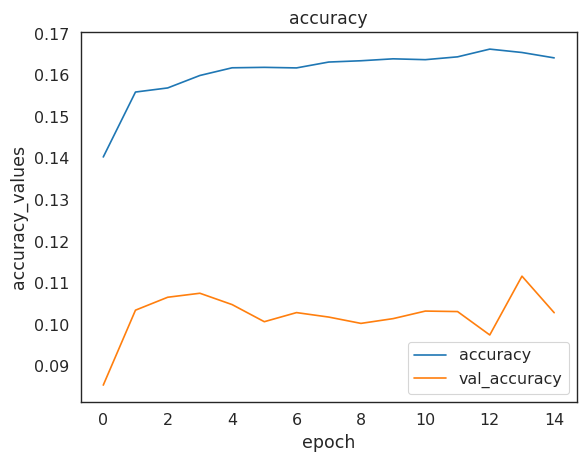

In [ ]:
plt1.figure()
plt1.plot(history.history['accuracy'],label='accuracy')
plt1.plot(history.history['val_accuracy'],label='val_accuracy')
plt1.title('accuracy')
plt1.ylabel('accuracy_values')
plt1.xlabel('epoch')
plt1.legend()
plt1.show();